In [1]:
#First we will import all the important libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [2]:
inp0 = pd.read_csv(r'C:\Users\SANKET GARG\OneDrive\Desktop\application_data.csv')#loading the first data file application_data
inp1=pd.read_csv(r'C:\Users\SANKET GARG\Downloads\previous_application.csv')#loading the second data file previous_application we will use it later

In [3]:
inp0.shape#checking the shape of the first dataset

(307511, 122)

In [4]:
inp0.info(-1) #getting all the information needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
# after loading the dataset we will now stat the data cleaning process

In [6]:
#number of null value in the dataset so that they can be cleaned
null_value = inp0.isnull().sum()
null_value

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#find the total percentage of null values in each column and check if the percentage of null value in that column is greater than 30%
null_value1= inp0.isnull().sum()*100/len(inp0)
null_value1=null_value1[null_value1.values>30.00]
null_value1

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

In [8]:
#to drop the columns that has percentage of null value greater than the 30% as their is much data missing 
inp0.drop(labels=null_value1.index,axis='columns',inplace=True)

In [9]:
#to check if the columns have been deleted or not
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [10]:
inp0.shape#checking the shape again and we can see that the number of columns have been reduced


(307511, 72)

In [11]:
#now we will check the percentage of all the data missing that is greater than 0 so that we can either impute them or delete them
null_value2= inp0.isnull().sum()*100/len(inp0)
null_value2=null_value2[null_value2>0.0000]
null_value2.sort_values(ascending=False)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [12]:
#as we can see the percentage is not that much so we will try to impute the data and replace the null value with either median or mode

In [13]:
#checking the info of the missing data columns
inp0[null_value2.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_ANNUITY                 307499 non-null  float64
 1   AMT_GOODS_PRICE             307233 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   CNT_FAM_MEMBERS             307509 non-null  float64
 4   EXT_SOURCE_2                306851 non-null  float64
 5   EXT_SOURCE_3                246546 non-null  float64
 6   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 7   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 8   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 11  AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 13  AMT_REQ_CREDIT

In [14]:
#creating a list of all the data missing columns
null_value3=list(null_value2.index)

In [15]:
null_value3 #display the list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [16]:
#taking the data one by one according to their percentage in ascending order

In [17]:
inp0.EXT_SOURCE_3.value_counts()#we will first take the EXT_SOURCE_3 and see what to apply mode or median

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [18]:
inp0.EXT_SOURCE_3.isnull().sum()#here we finf the total number of null value in this column

60965

In [19]:
inp0.EXT_SOURCE_3.describe()#describing the column

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:>

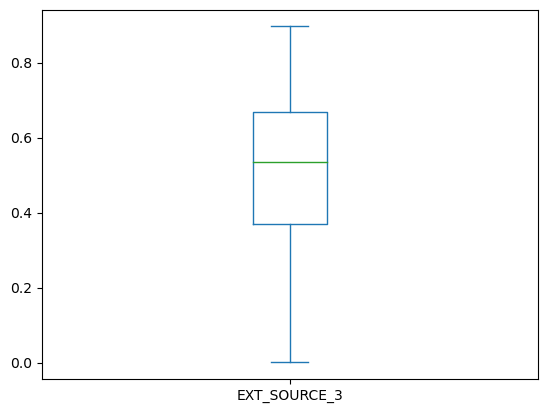

In [20]:
inp0.EXT_SOURCE_3.plot.box()#finding the ouliers in the column

In [21]:
median_source_3=inp0.EXT_SOURCE_3.median()#the null values in this column can be replaced by median

In [22]:
inp0.loc[inp0['EXT_SOURCE_3'].isnull(),'EXT_SOURCE_3']=median_source_3

In [23]:
inp0.EXT_SOURCE_3.isnull().sum()#checking again the total number of null values

0

In [24]:
##

In [25]:
inp0.AMT_ANNUITY.value_counts()#taking now the second column in that list we will check the value counts

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [26]:
inp0.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

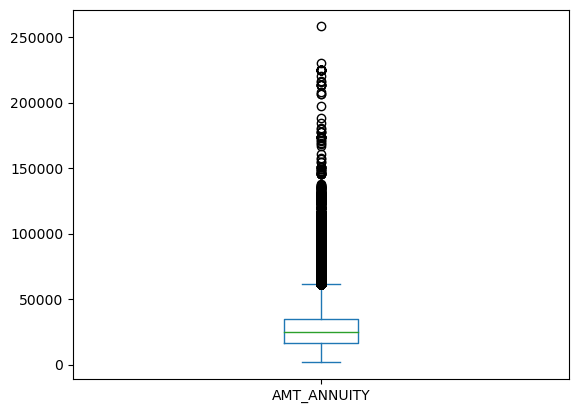

In [27]:
inp0.AMT_ANNUITY.plot.box()
median_value=inp0.AMT_ANNUITY.median()
inp0.loc[inp0['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=median_value

In [28]:
median_value=inp0.AMT_ANNUITY.median()
inp0.loc[inp0['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=median_value#replacing the null value with the median

In [29]:
inp0.AMT_ANNUITY.isnull().sum()#confirming if null value remained

0

In [30]:
##

In [31]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()#taking the third column

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [32]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [33]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]

0.0

In [34]:
# we will deal with it by replacing the null value with mode
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace=True)

In [35]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()#confirming

0

In [36]:
##

In [37]:
#we will now do the same with the rest of the remaining columns

In [38]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [39]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]

0.0

In [40]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace=True)

In [41]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [42]:
##

In [43]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [44]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]

0.0

In [45]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(inp0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace=True)

In [46]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [47]:
##

In [48]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [49]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]

0.0

In [50]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.fillna(inp0.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace=True)

In [51]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [52]:
##

In [53]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [54]:
fill_qrt=inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
fill_qrt

0.0

In [55]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(fill_qrt,inplace=True)

In [56]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [57]:
##

In [58]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [59]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [60]:
fill_year=inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]
fill_year

0.0

In [61]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(fill_year,inplace=True)

In [62]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [63]:
##

In [64]:
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [65]:
inp0.NAME_TYPE_SUITE.isnull().sum()

1292

In [66]:
fill_suite=inp0.NAME_TYPE_SUITE.mode()[0]
fill_suite

'Unaccompanied'

In [67]:
inp0.NAME_TYPE_SUITE.fillna(fill_suite,inplace=True)

In [68]:
inp0.NAME_TYPE_SUITE.isnull().sum()

0

In [69]:
##

In [70]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [71]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [72]:
fill_obs_30=inp0.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]
fill_obs_30

0.0

In [73]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.fillna(fill_obs_30,inplace=True)

In [74]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [75]:
##

In [76]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [77]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [78]:
fill_def_30=inp0.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0]
fill_def_30

0.0

In [79]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.fillna(fill_def_30,inplace=True)

In [80]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [81]:
##

In [82]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [83]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [84]:
fill_obs_60=inp0.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]
fill_obs_60

0.0

In [85]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.fillna(fill_obs_60,inplace=True)

In [86]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [87]:
##

In [88]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [89]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [90]:
fill_def_60=inp0.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]
fill_def_60

0.0

In [91]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.fillna(fill_def_60,inplace=True)

In [92]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [93]:
##

In [94]:
inp0.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [95]:
inp0.EXT_SOURCE_2.isnull().sum()

660

In [96]:
inp0.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

<AxesSubplot:>

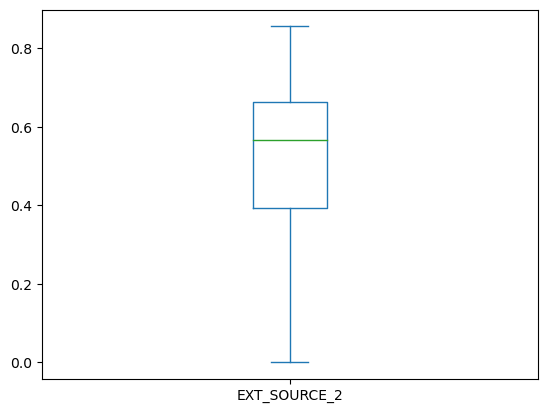

In [97]:
inp0.EXT_SOURCE_2.plot.box()

In [98]:
median_source_2=inp0.EXT_SOURCE_2.median()

In [99]:
inp0.loc[inp0['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']=median_source_2

In [100]:
inp0.EXT_SOURCE_2.isnull().sum()

0

In [101]:
# checking again the number of remaining percentage of vaue counts 

In [102]:
null_value_5=inp0.isnull().sum()*100/len(inp0)

In [103]:
null_value_5=null_value_5[null_value_5>0.0000]
null_value_5

AMT_GOODS_PRICE           0.090403
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

In [104]:
#these are of very low percentage so we are gonna try to impute them as well

In [105]:
inp0.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [106]:
inp0.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [107]:
inp0.AMT_GOODS_PRICE.isnull().sum()

278

<AxesSubplot:>

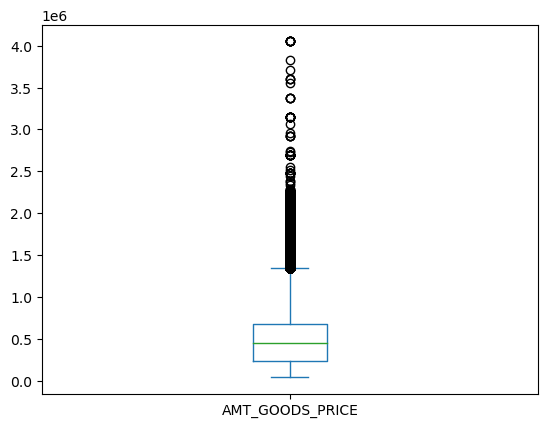

In [108]:
inp0.AMT_GOODS_PRICE.plot.box()

In [109]:
median_goods_price=inp0.AMT_GOODS_PRICE.median()

In [110]:
inp0.loc[inp0['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=median_goods_price

In [111]:
inp0.AMT_GOODS_PRICE.isnull().sum()

0

In [112]:
##

In [113]:
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [114]:
inp0.CNT_FAM_MEMBERS.isnull().sum()

2

In [115]:
fill_members=inp0.CNT_FAM_MEMBERS.mode()[0]
fill_members

2.0

In [116]:
inp0.CNT_FAM_MEMBERS.fillna(fill_members,inplace=True)

In [117]:
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

In [118]:
##

In [119]:
inp0.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [120]:
inp0.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [121]:
fill_phone_change=inp0.DAYS_LAST_PHONE_CHANGE.mode()[0]
fill_phone_change

0.0

In [122]:
inp0.DAYS_LAST_PHONE_CHANGE.fillna(fill_phone_change,inplace=True)

In [123]:
inp0.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [124]:
#all the data has been cleaned now of null values


In [125]:
#now we will look into the unwanted columns and will remove them as their is no need to keep them in our analysis
inp0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279

In [126]:
unwanted_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [127]:
inp0.drop(labels=unwanted_columns,axis=1,inplace=True)#dropping the data that is not required

In [128]:
inp0.head(10)#checking if the columns have been removed or not

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.535276,2.0,0.0,2.0,0.0,-1673.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# here we can that  some values are negative we will change them in positive since they can create problem in our computing process

In [130]:
negative_value=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [131]:
inp0[negative_value]=abs(inp0[negative_value])

In [132]:
inp0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.535276,2.0,0.0,2.0,0.0,1673.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
inp0.TARGET.value_counts()#checking if there is any disparity

0    282686
1     24825
Name: TARGET, dtype: int64

In [134]:
inp0.NAME_CONTRACT_TYPE.value_counts()#checking disparity

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [135]:
inp0.CODE_GENDER.value_counts()#checking disparity

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [136]:
#here xna means null we can replace it with female or we can say the mode of the dataset

In [137]:
fill_gender=inp0.CODE_GENDER.mode()[0]
fill_gender

'F'

In [138]:
inp0.CODE_GENDER.replace('XNA',fill_gender,inplace=True)

In [139]:
inp0.CODE_GENDER.value_counts()#checking for XNA

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [140]:
#in the above dataframe head we can see xna value in organization_type also

In [141]:
inp0.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [142]:
#since the value of xna is quite high we will see if it is MAR(missing at random) or MNAR(missing not at random)
#if it is MAR we can delete it if not we will have to impute it either with new value or with most frequent one or with median

In [143]:
inp0.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.535276,2.0,0.0,2.0,0.0,1673.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
#here we can see there is some type of relation between ORGANIZATION_TYPE's XNA and NAME_INCOME_TYPE's pensioner 
#lets confirm it

In [145]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [146]:
inp0.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [147]:
#checking if the number of the pensioner in name_income_type is equal to the XNA in organization_type
y = 0
for i, x in inp0.iterrows():
    if x['NAME_INCOME_TYPE'] == 'Pensioner' and x['ORGANIZATION_TYPE'] == 'XNA':
        y += 1

print(y)

55352


In [148]:
# we can see that the value of xna is approximately equal to pensioner so it is MCAR hence we will not delete it but replace it with retired_employee

In [149]:
inp0.ORGANIZATION_TYPE.replace('XNA','Retired_employee',inplace=True)#replaced

In [150]:
inp0.head(50)#checking

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,WEDNESDAY,14,0,0,0,0,0,0,Retired_employee,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.535276,2.0,0.0,2.0,0.0,1673.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
inp0.info() #checking for any further changes that has to be made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [152]:
#now we will maake some changes in the data type of the columns 

In [153]:
inp0.SK_ID_CURR.astype('object')

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: object

In [154]:
inp0.DAYS_REGISTRATION.astype('int64')

0         3648
1         1186
2         4260
3         9833
4         4311
          ... 
307506    8456
307507    4388
307508    6737
307509    2562
307510    5128
Name: DAYS_REGISTRATION, Length: 307511, dtype: int64

In [155]:
change_type=['DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']

In [156]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.astype('int64')

0         2
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: DEF_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: int64

In [157]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.astype('int64')

0         2
1         1
2         0
3         2
4         0
         ..
307506    0
307507    0
307508    6
307509    0
307510    0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: int64

In [158]:
for char in change_type:
    inp0[char]=inp0[char].astype('int64')#running a loop to change the data type

In [159]:
inp0.info()#confirming if the changes are made or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [160]:
for col in inp0.columns:
    print(inp0[col].unique())#checking for all unique values

[100002 100003 100004 ... 456253 456254 456255]
[1 0]
['Cash loans' 'Revolving loans']
['M' 'F']
['N' 'Y']
['Y' 'N']
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.0

In [161]:
inp0.columns#just checking

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
  

In [162]:
type_change=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']#changing the type to int of some columns

In [163]:
inp0[type_change].astype('int64')

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
307506,0,0,0,0,0,0
307507,0,0,0,0,0,0
307508,1,0,0,1,0,1
307509,0,0,0,0,0,0


In [164]:
#we will now start binning the income type and credit type

In [165]:
inp0.AMT_INCOME_TOTAL.unique()

array([202500. , 270000. ,  67500. , ...,  96768. , 546250.5, 113062.5])

In [166]:
#now lets describe them

[Text(0.5, 1.0, '100% of AMT_INCOME_TOTAL')]

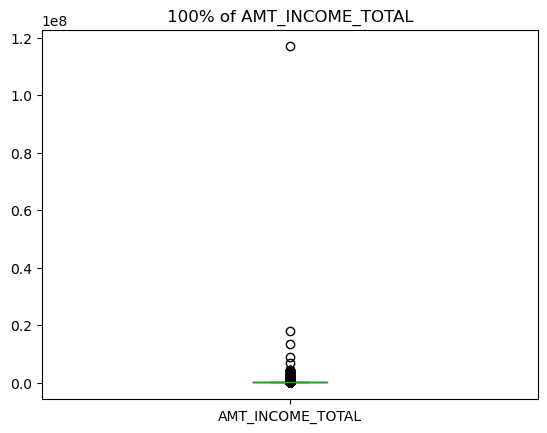

In [167]:
inp0.AMT_INCOME_TOTAL.plot.box().set(title='100% of AMT_INCOME_TOTAL')

In [168]:
inp0.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

[Text(0.5, 1.0, '99% of AMT_INCOME_TOTAL')]

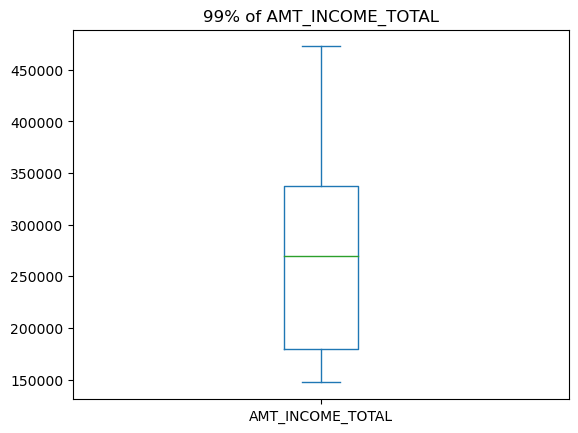

In [169]:
inp0.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99]).plot.box().set(title='99% of AMT_INCOME_TOTAL')

In [170]:
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [171]:
# we will now create bins for AMT_INCOME_TOTAL from 250000 onwards and range of 0-250000
income_bin=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,100000000]
income_x_range=['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000+']

In [172]:
inp0.AMT_CREDIT.value_counts()#checking all the value counts

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

[Text(0.5, 1.0, '100% of AMT_CREDIT')]

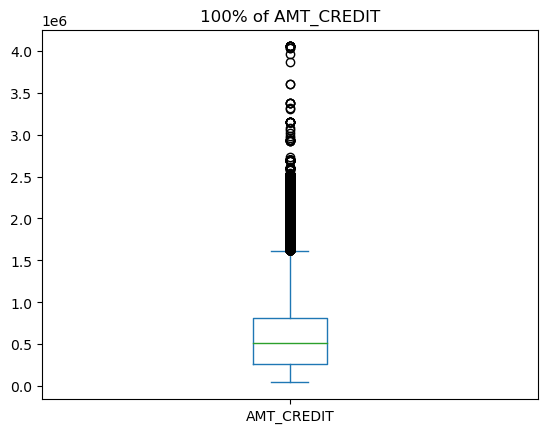

In [173]:
inp0.AMT_CREDIT.plot.box().set(title='100% of AMT_CREDIT')

In [174]:
inp0.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

[Text(0.5, 1.0, '99% of CREDIT')]

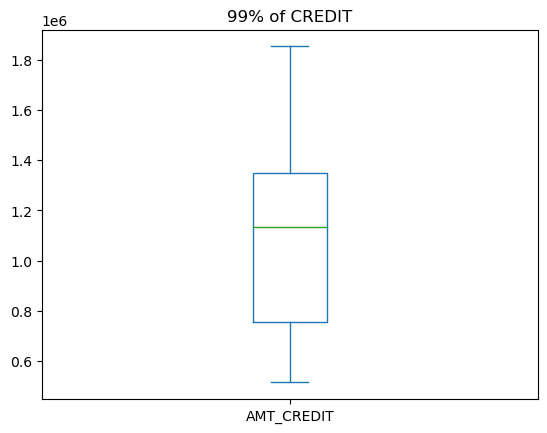

In [175]:
inp0.AMT_CREDIT.quantile([0.5,0.7,0.9,0.95,0.99]).plot.box().set(title='99% of CREDIT')

Same 99% lies inside only top 1% lies outside

In [176]:
#now we will create bins for AMT_CREDIT 

In [177]:
credit_bin=[0,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,10000000]
credit_range= ['0-100000','100000-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000+']

In [178]:
#now will make the graphs using this bins for both 

In [179]:
inp0['AMT_INCOME_TOTAL_RANGE']=pd.cut(inp0.AMT_INCOME_TOTAL,bins=income_bin,labels=income_x_range)


In [180]:
inp0['AMT_CREDIT_RANGE']=pd.cut(inp0.AMT_CREDIT,bins=credit_bin,labels=credit_range)

In [181]:
inp0.head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,1134,0,0,0,0,0,1,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,828,0,0,0,0,0,0,250000-275000,900000+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,815,0,0,0,0,0,0,50000-75000,100000-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,617,0,0,0,0,0,0,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,1106,0,0,0,0,0,0,100000-125000,500000-550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100113,0,Cash loans,M,Y,N,0,76500.0,135000.0,6696.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,15137,7980,9176.0,4576,MONDAY,10,0,0,0,0,0,0,Agriculture,0.593019,0.789880,0,0,0,0,1981,0,0,0,0,0,2,"75000,100000",100000-150000
96,100114,0,Cash loans,F,N,Y,0,135000.0,284400.0,22599.0,225000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.030755,10734,693,7913.0,1362,MONDAY,14,0,0,0,1,1,0,Restaurant,0.154937,0.265049,0,0,0,0,227,0,0,0,0,0,2,125000-150000,250000-300000
97,100115,0,Cash loans,F,N,N,0,90000.0,315000.0,14683.5,315000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.028663,15371,367,3071.0,4211,SUNDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.334300,0.535276,0,0,0,0,40,0,0,0,0,2,2,"75000,100000",300000-350000
98,100116,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,900000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010006,14751,6737,3390.0,4788,THURSDAY,11,0,0,0,0,1,1,Kindergarten,0.700274,0.071055,2,0,2,0,1083,0,0,0,0,0,0,225000-250000,850000-900000


In [182]:
inp0.AMT_CREDIT_RANGE.unique() #checking the values uniqueness

['400000-450000', '900000+', '100000-150000', '300000-350000', '500000-550000', ..., '600000-650000', '800000-850000', '550000-600000', '350000-400000', '850000-900000']
Length: 18
Categories (18, object): ['0-100000' < '100000-150000' < '150000-200000' < '200000-250000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000+']

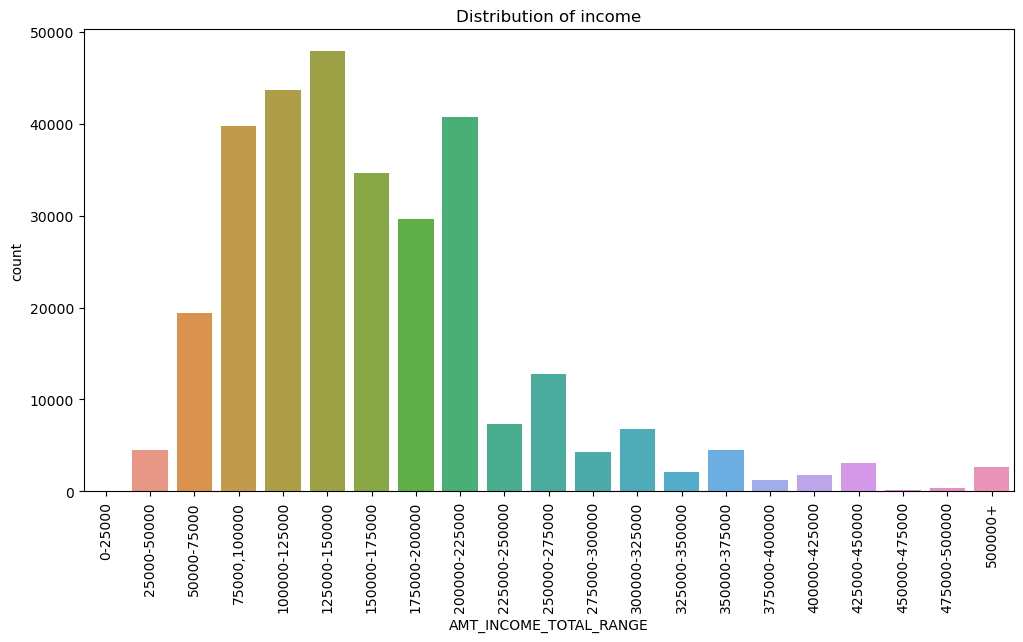

In [183]:
#checking how many people has how much income
plt.figure(figsize=(12,6))
sns.countplot(data=inp0,x='AMT_INCOME_TOTAL_RANGE').set(title='Distribution of income')
plt.xticks(rotation=90)
plt.show()

In [184]:
#a for loop
a=0
b=0
for x in inp0['CODE_GENDER']:
    if x =="F":
        a=a+1
    else:
        b=b+1
print(a)
print(b)
print('the ratio is',a/b)
#running a loop to find the total no. of males and females and their ratio

202452
105059
the ratio is 1.9270314775507096


In [185]:
#no of females is approximately twice of the number of males

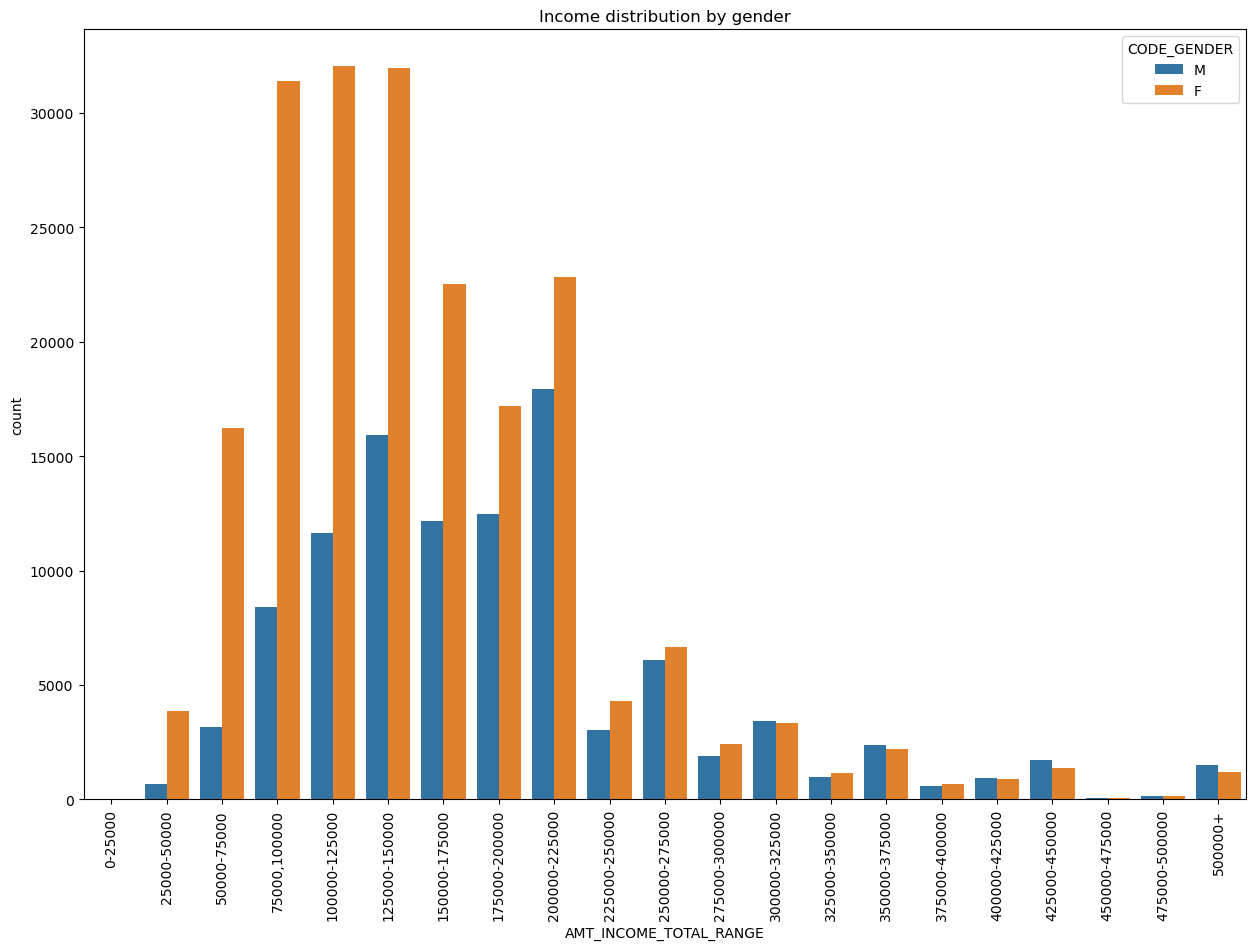

In [186]:
#checking income range based on gender
plt.figure(figsize=(15,10)) 
sns.countplot(data=inp0,x='AMT_INCOME_TOTAL_RANGE',hue='CODE_GENDER').set(title='Income distribution by gender')
plt.xticks(rotation=90)
plt.show()

In [187]:
inp0.info()#hecking the info once again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

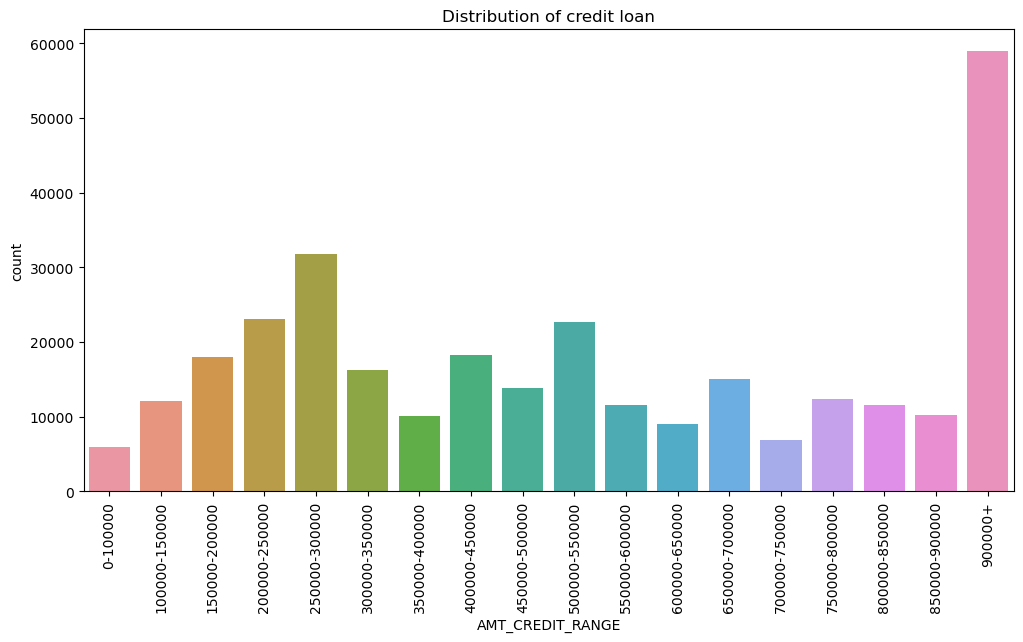

In [188]:
#checking the credit loan count
plt.figure(figsize=(12,6))
sns.countplot(data=inp0,x='AMT_CREDIT_RANGE').set(title='Distribution of credit loan')
plt.xticks(rotation=90)
plt.show()

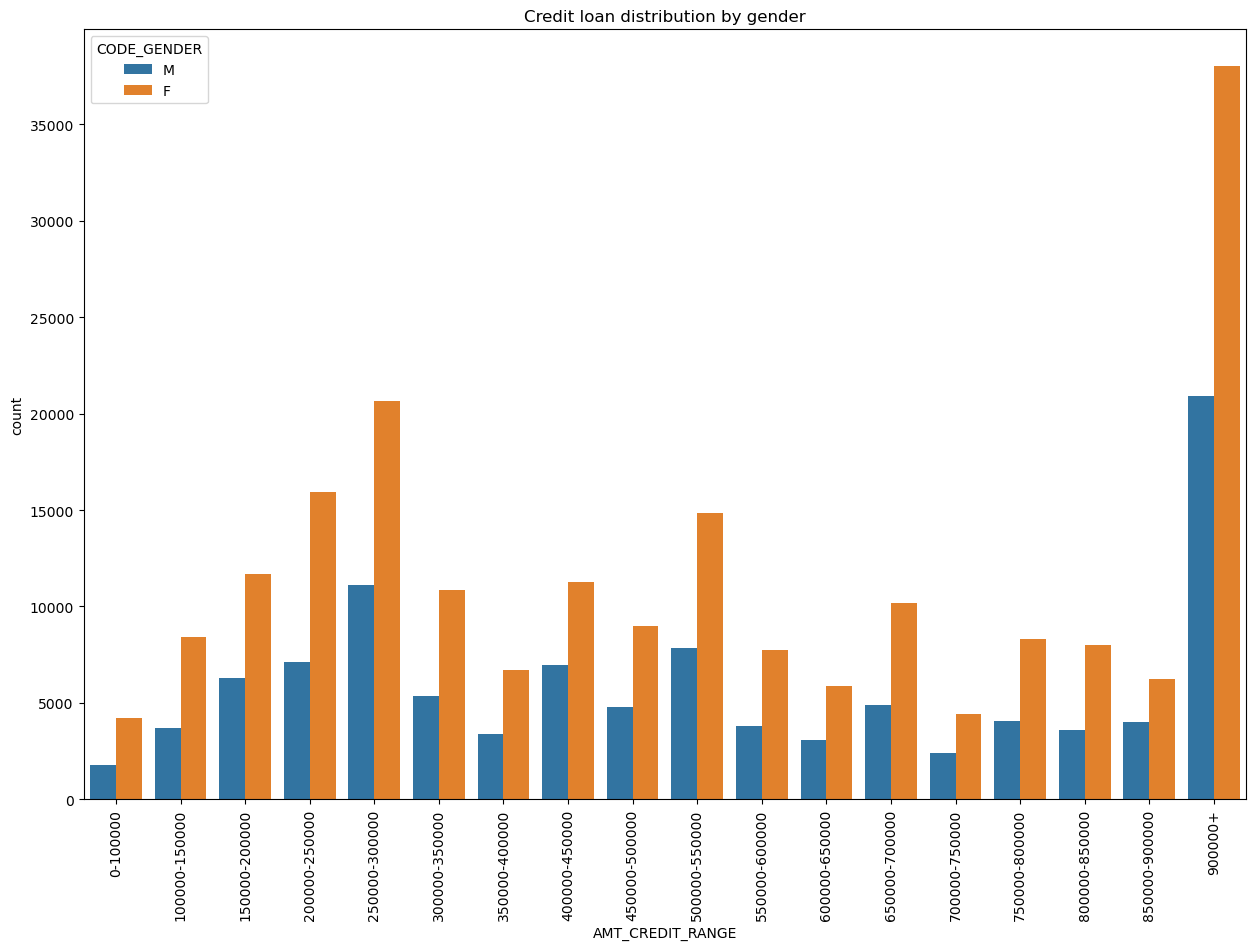

In [189]:
#checking credit loan based on gender
plt.figure(figsize=(15,10)) 
sns.countplot(data=inp0,x='AMT_CREDIT_RANGE',hue='CODE_GENDER').set(title='Credit loan distribution by gender')
plt.xticks(rotation=90)
plt.show()

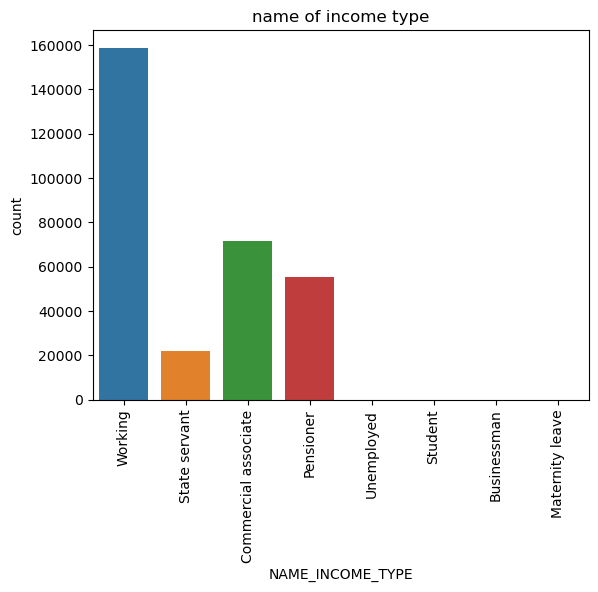

In [190]:
#checking the number of people's income type name
sns.countplot(data=inp0,x='NAME_INCOME_TYPE').set(title='name of income type')
plt.xticks(rotation=90)
plt.show()

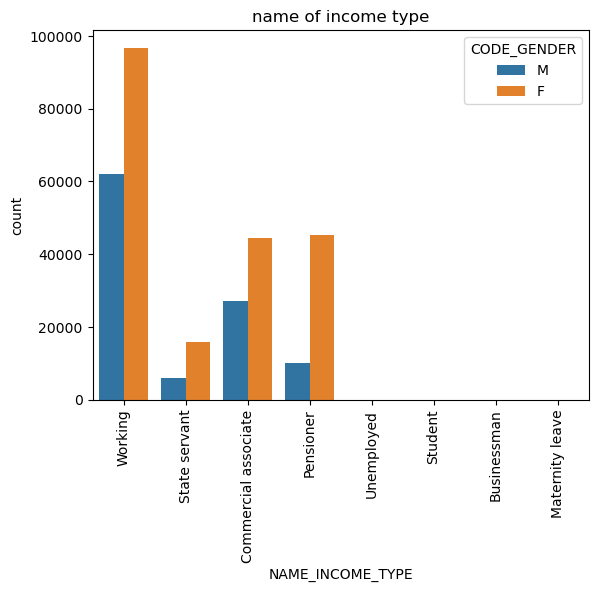

In [191]:
#checking income type name based on gender
sns.countplot(data=inp0,x='NAME_INCOME_TYPE',hue='CODE_GENDER').set(title='name of income type')
plt.xticks(rotation=90)
plt.show()

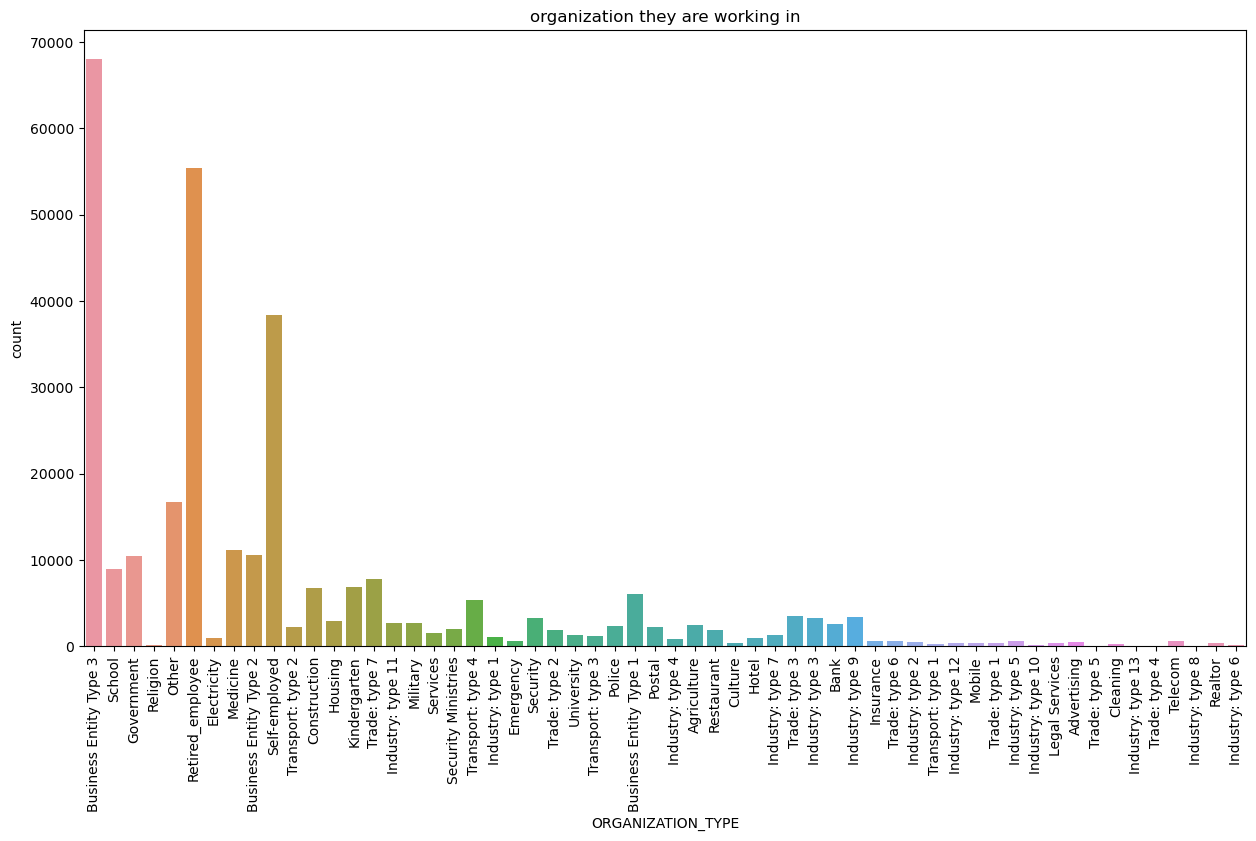

In [192]:
#Number of people working in different organization
plt.figure(figsize=(15,8))
sns.countplot(data=inp0,x='ORGANIZATION_TYPE').set(title='organization they are working in')
plt.xticks(rotation=90)
plt.show()

In [193]:
#now we will deal with the target column i.e. customers with and without payment difficulties and dividing them into two diff categories

In [194]:
inp0_target0=inp0.loc[inp0.TARGET==0]#consumers having no payment difficulties i.e. non defaluters

In [195]:

inp0_target1=inp0.loc[inp0.TARGET==1]#consumers having payment difficulties i.e. defaulters

In [196]:
#finding the ratio of target

In [197]:
a=0
b=0
for x in inp0['TARGET']:
    if x == 0:
        a=a+1
    else:
        b=b+1
print(a)
print(b)
print('The ratio of TARGET is',a/b)

282686
24825
The ratio of TARGET is 11.387150050352467


In [198]:
#Ratio of the non defaulters to the ratio of defaulters
#the number of non defaulters is 11.4 times more than the number of defaulters

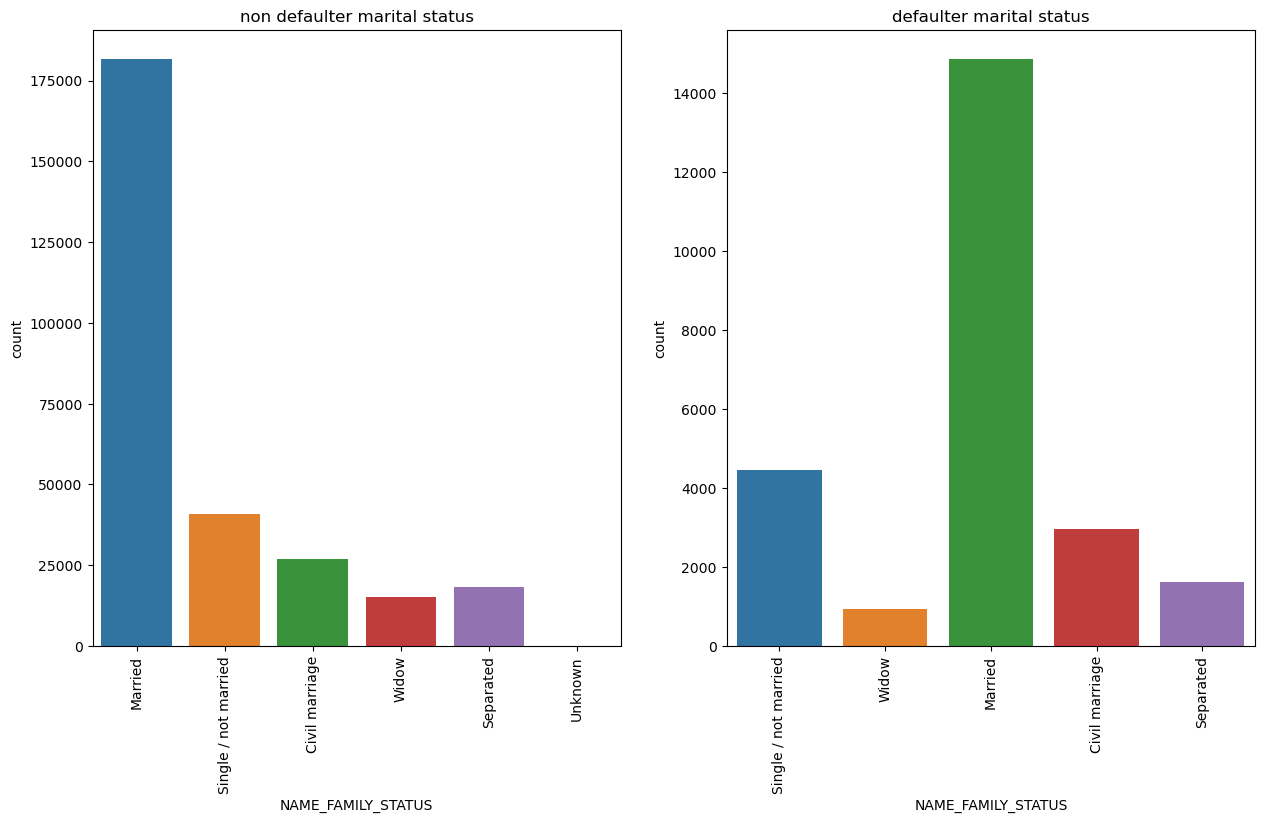

In [199]:
#checking their marital status(defaulters,nonn-defaulters)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data=inp0_target0,x='NAME_FAMILY_STATUS').set(title='non defaulter marital status')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(data=inp0_target1,x='NAME_FAMILY_STATUS').set(title='defaulter marital status')
plt.xticks(rotation=90)
plt.show()

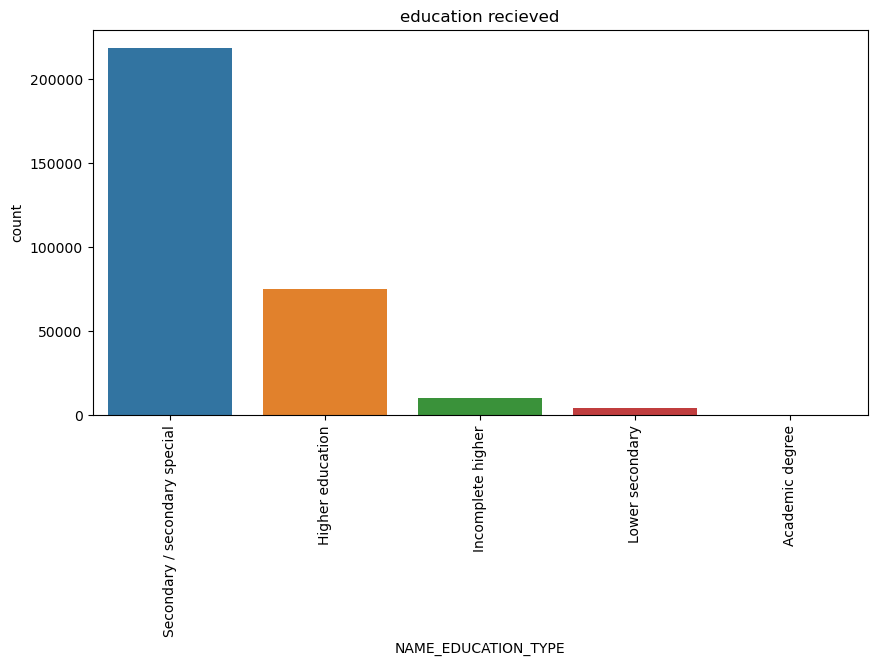

In [200]:
#checking the education of the peoples in data and their count
plt.figure(figsize=(10,5))
sns.countplot(data=inp0,x='NAME_EDUCATION_TYPE').set(title='education recieved')
plt.xticks(rotation=90)
plt.show()

In [201]:
#checking the above education type for defaulters and non defaulters

In [202]:
#we can see there is the difference in the graphs of target value 0 and target value 1 people counts if we put it side by side 

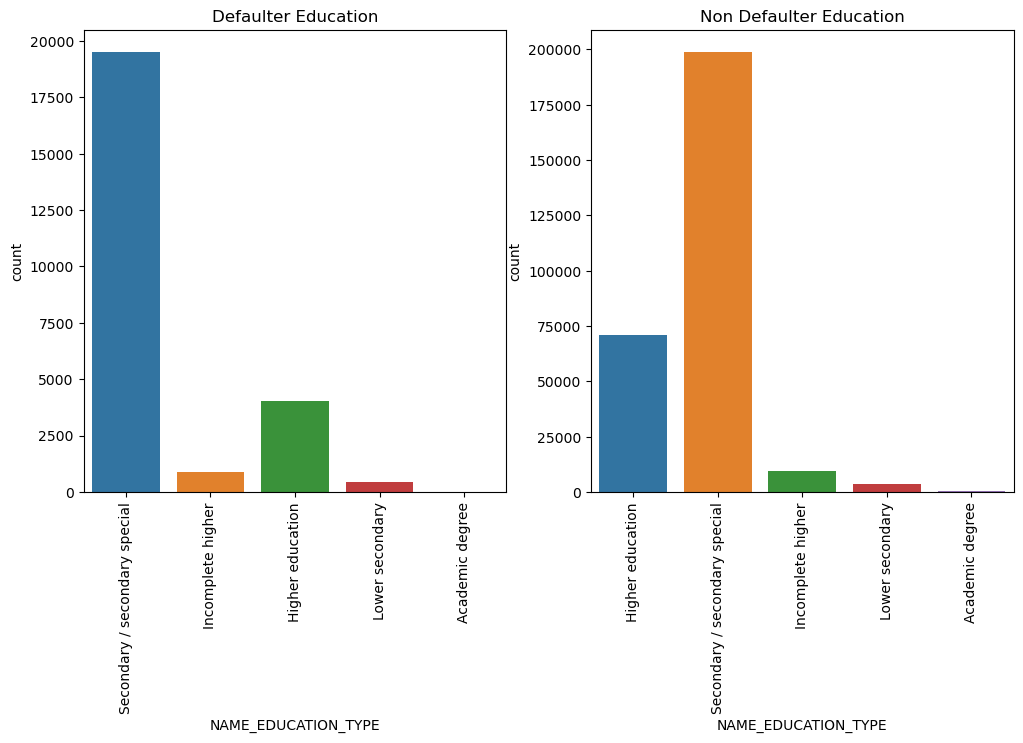

In [203]:
plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
sns.countplot(data=inp0_target1,x='NAME_EDUCATION_TYPE').set(title='Defaulter Education')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=inp0_target0,x='NAME_EDUCATION_TYPE').set(title='Non Defaulter Education')
plt.xticks(rotation=90)
plt.show()

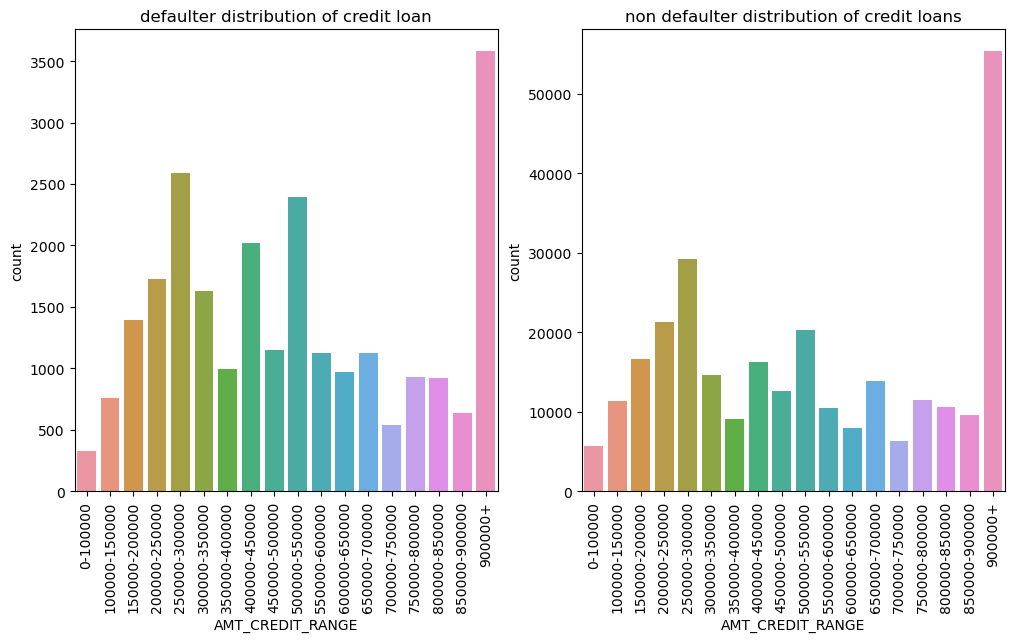

In [204]:
#credit loan by defaulters vs non-defaulters
plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
sns.countplot(data=inp0_target1,x='AMT_CREDIT_RANGE').set(title='defaulter distribution of credit loan')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=inp0_target0,x='AMT_CREDIT_RANGE').set(title='non defaulter distribution of credit loans')
plt.xticks(rotation=90)
plt.show()

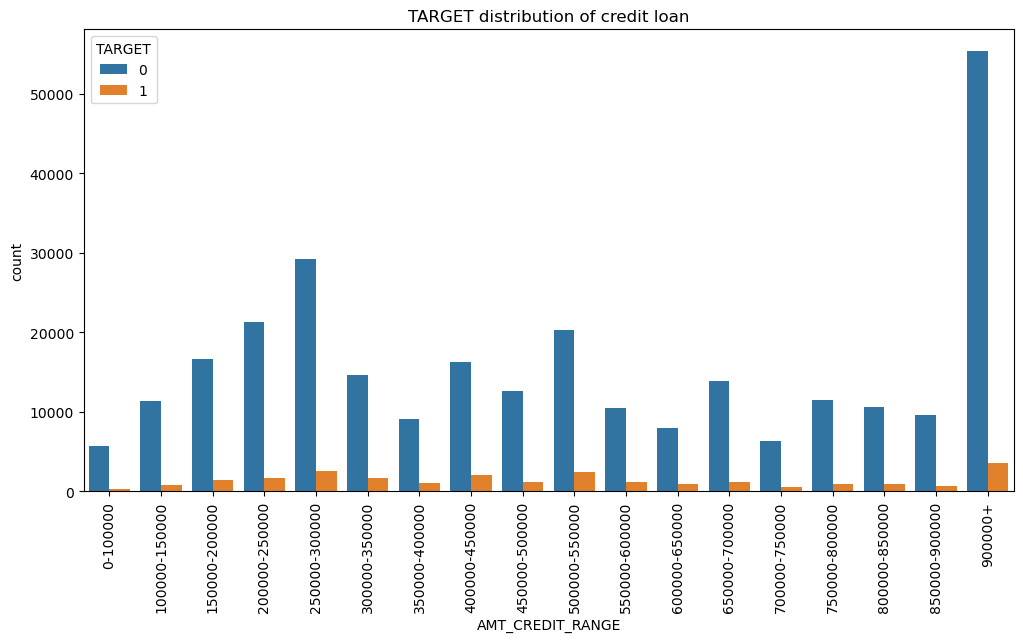

In [205]:
plt.figure(figsize=(12,6)) 
sns.countplot(data=inp0,x='AMT_CREDIT_RANGE',hue=inp0.TARGET).set(title='TARGET distribution of credit loan')
plt.xticks(rotation=90)
plt.show()

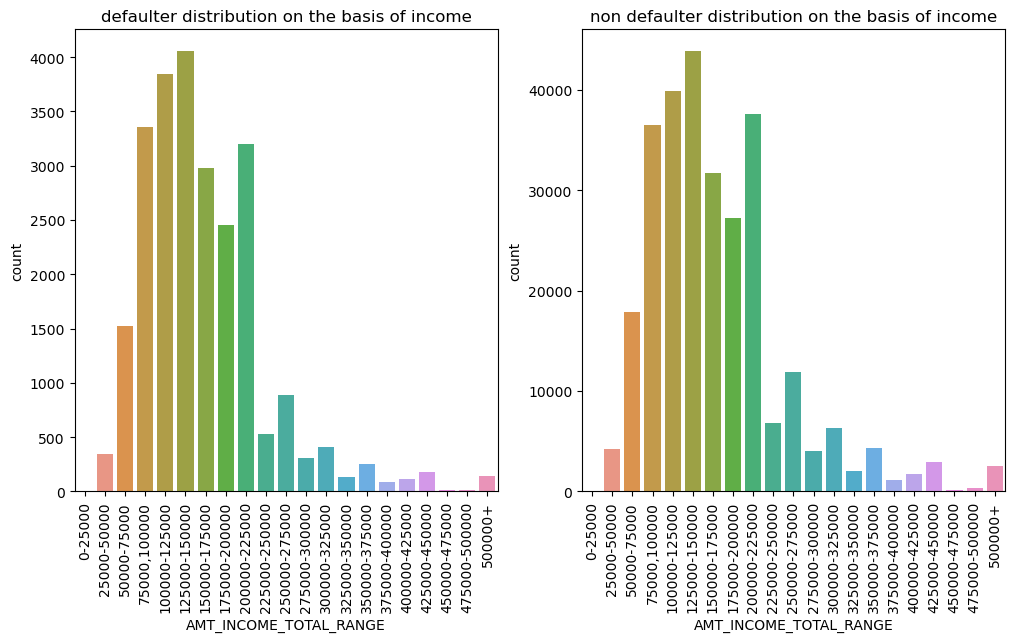

In [206]:
plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
sns.countplot(data=inp0_target1,x='AMT_INCOME_TOTAL_RANGE').set(title='defaulter distribution on the basis of income')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=inp0_target0,x='AMT_INCOME_TOTAL_RANGE').set(title='non defaulter distribution on the basis of income')
plt.xticks(rotation=90)
plt.show()

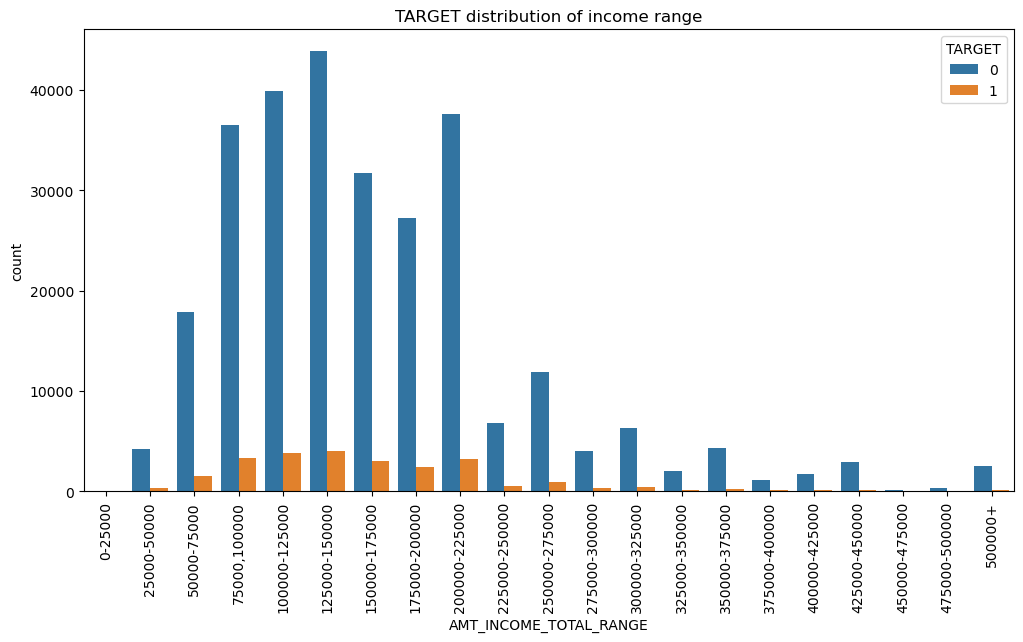

In [207]:
plt.figure(figsize=(12,6)) 
sns.countplot(data=inp0,x='AMT_INCOME_TOTAL_RANGE',hue=inp0.TARGET).set(title='TARGET distribution of income range')
plt.xticks(rotation=90)
plt.show()

In [208]:
#now we will find the correlation between the columns that are somewhat meaningful


In [209]:
inp0_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,828,0,0,0,0,0,0,250000-275000,900000+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,815,0,0,0,0,0,0,50000-75000,100000-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,617,0,0,0,0,0,0,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,1106,0,0,0,0,0,0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0,0,0,0,2536,0,0,0,0,1,1,"75000,100000",450000-500000


In [210]:
#taking the columns that are starting from cnt_children to 


In [211]:
#for non-defaulters
corr_target0=inp0_target0.iloc[0:,6:28]

In [212]:
#for defaulters
corr_target1=inp0_target1.iloc[0:,6:28]

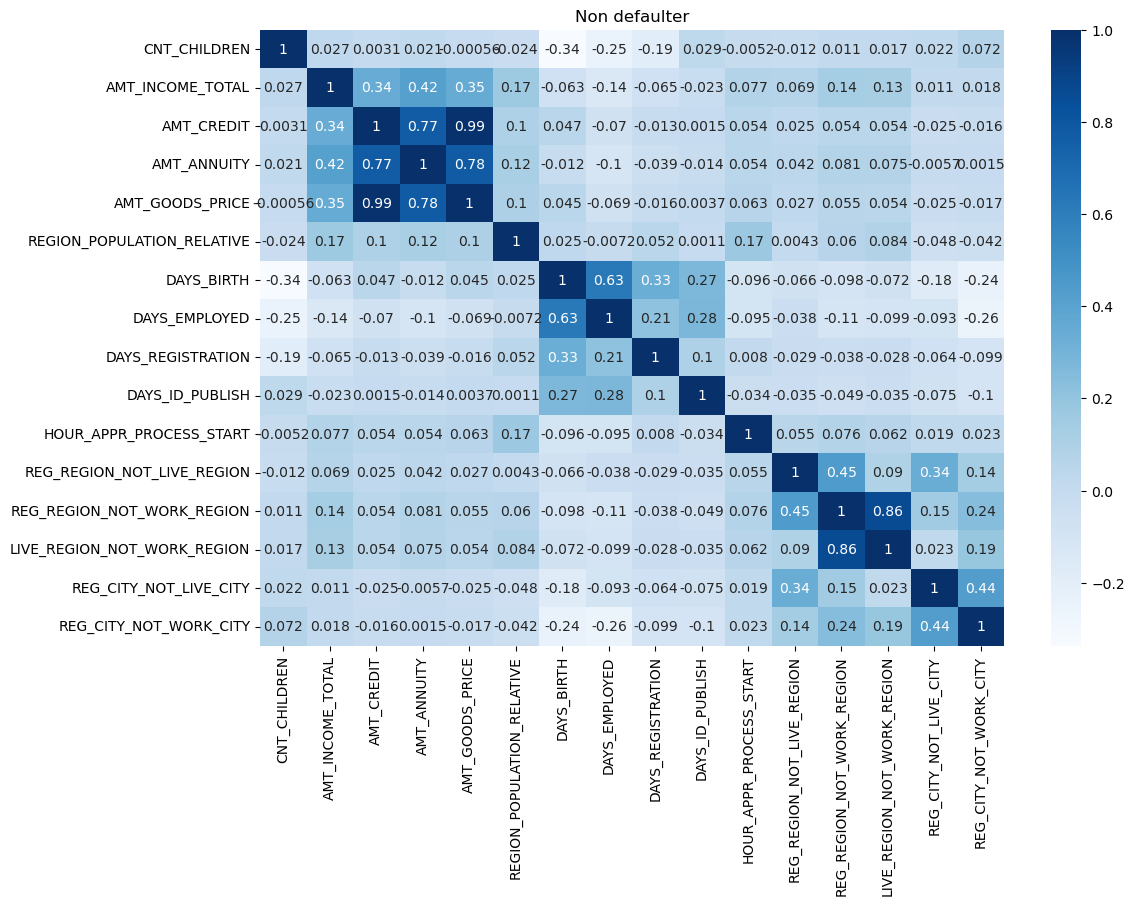

In [213]:
#Using the heatmap we can easily find the correlation between the columns of the dataframe of nondefaulters
plt.figure(figsize=(12,8)) 
sns.heatmap(corr_target0.corr(), annot=True, cmap="Blues").set(title='Non defaulter')
plt.show()

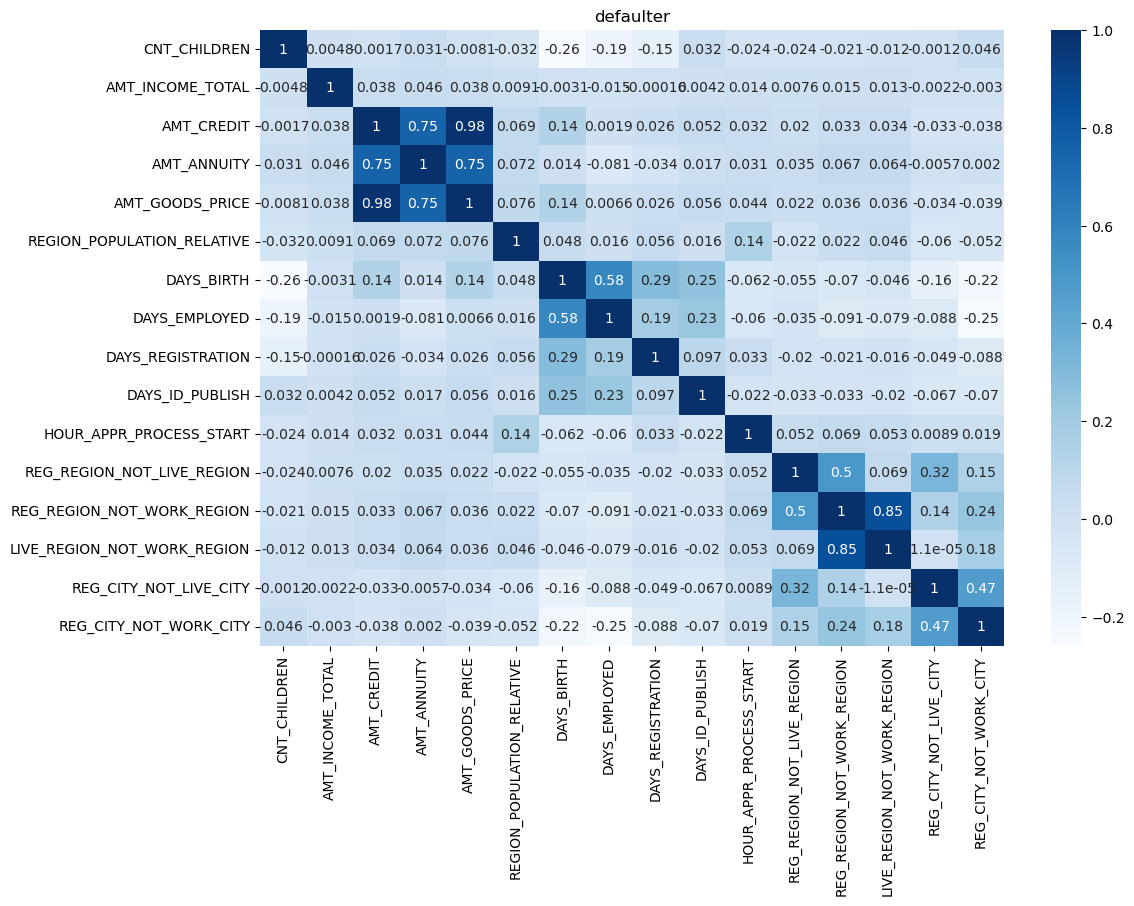

In [214]:
plt.figure(figsize=(12,8)) 
sns.heatmap(corr_target1.corr(), annot=True, cmap="Blues").set(title='defaulter')
plt.show()

In [215]:
#now we will find outliers for different different
#univariate analysis

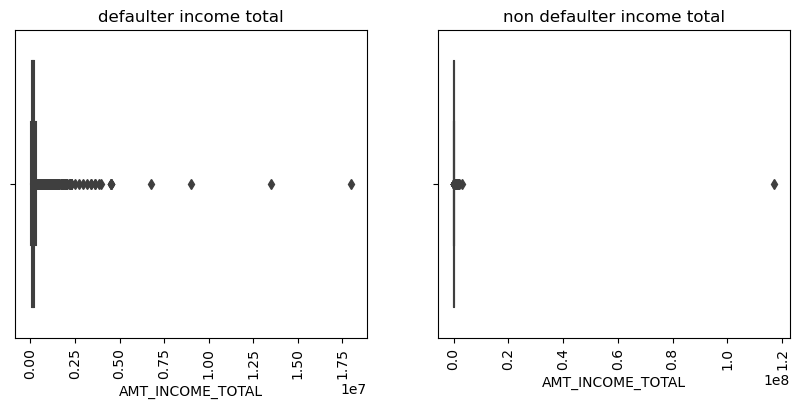

In [216]:
#finding outliers in defaulter and non defaulter amount income
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.boxplot(inp0_target0.AMT_INCOME_TOTAL).set(title='defaulter income total')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(inp0_target1.AMT_INCOME_TOTAL).set(title='non defaulter income total')
plt.xticks(rotation=90)
plt.show()

[Text(0.5, 1.0, 'non defaulter income total')]

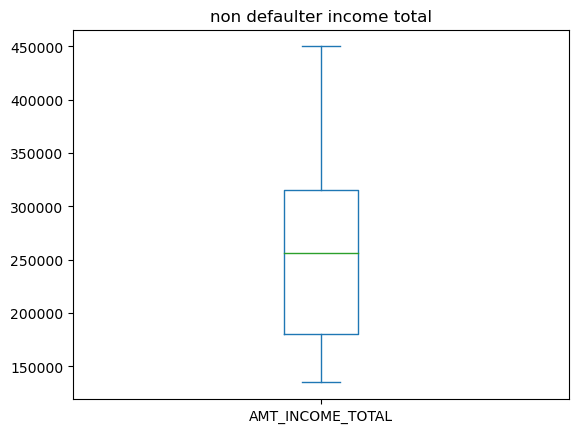

In [217]:
inp0_target1.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99]).plot.box().set(title='non defaulter income total')

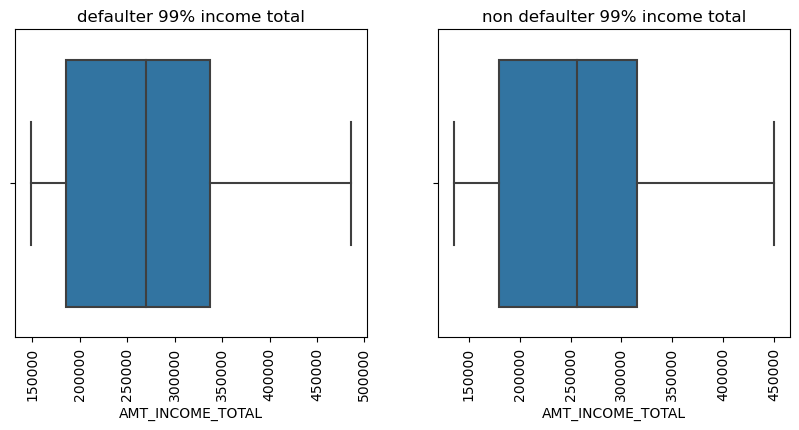

In [218]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.boxplot(inp0_target0.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])).set(title='defaulter 99% income total')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(inp0_target1.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])).set(title='non defaulter 99% income total')
plt.xticks(rotation=90)
plt.show()

In [219]:
inp0_target0.AMT_CREDIT_RANGE#just checking

1               900000+
2         100000-150000
3         300000-350000
4         500000-550000
5         450000-500000
              ...      
307505    200000-250000
307506    250000-300000
307507    250000-300000
307508    650000-700000
307510    650000-700000
Name: AMT_CREDIT_RANGE, Length: 282686, dtype: category
Categories (18, object): ['0-100000' < '100000-150000' < '150000-200000' < '200000-250000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000+']

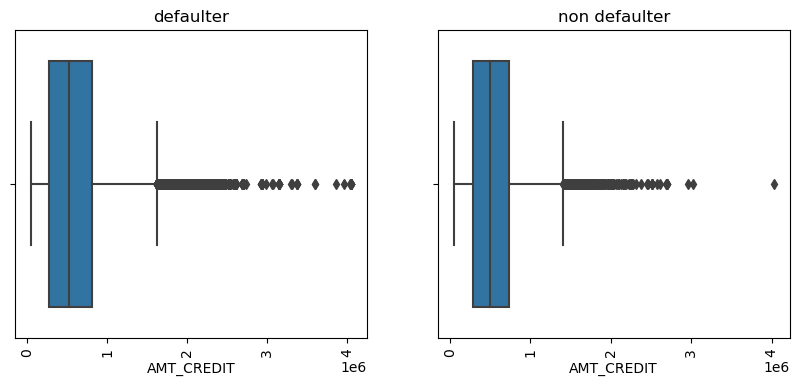

In [220]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.boxplot(inp0_target0.AMT_CREDIT).set(title='defaulter')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(inp0_target1.AMT_CREDIT).set(title='non defaulter')
plt.xticks(rotation=90)
plt.show()

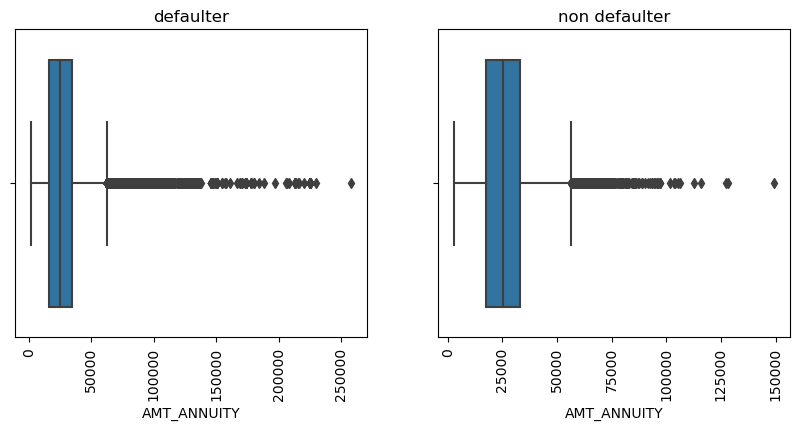

In [221]:
#Annunity for defaulters vs non defaulters
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.boxplot(inp0_target0.AMT_ANNUITY).set(title='defaulter')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(inp0_target1.AMT_ANNUITY).set(title='non defaulter')
plt.xticks(rotation=90)
plt.show()

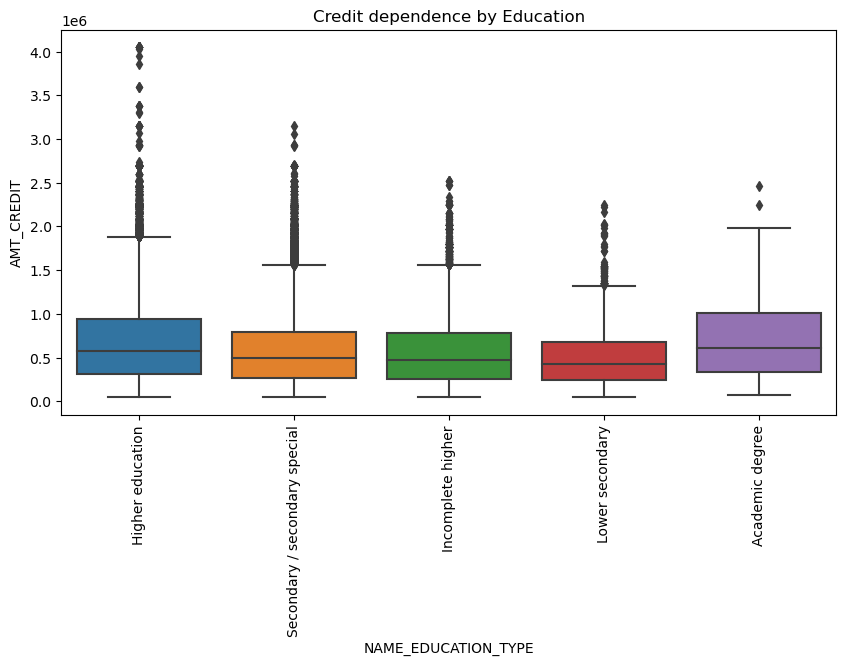

In [222]:
#now we will do the bivariate analysis
plt.figure(figsize=(10,5))
sns.boxplot(data =inp0_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('Credit dependence by Education')
plt.show()

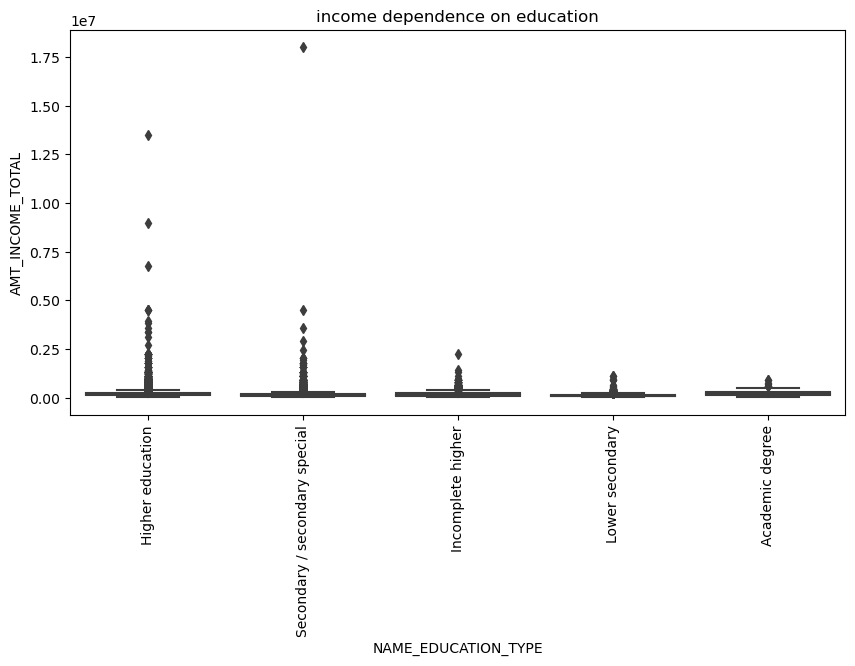

In [223]:
#finding the outliers of income based on education and we can see that for higher education their is higher income
plt.figure(figsize=(10,5))
sns.boxplot(data =inp0_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL')
plt.xticks(rotation=90)
plt.title('income dependence on education')
plt.show()

In [224]:
inp0_target0.head()#checking the info once again

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,828,0,0,0,0,0,0,250000-275000,900000+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,815,0,0,0,0,0,0,50000-75000,100000-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2,0,2,0,617,0,0,0,0,0,0,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0,0,0,0,1106,0,0,0,0,0,0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0,0,0,0,2536,0,0,0,0,1,1,"75000,100000",450000-500000


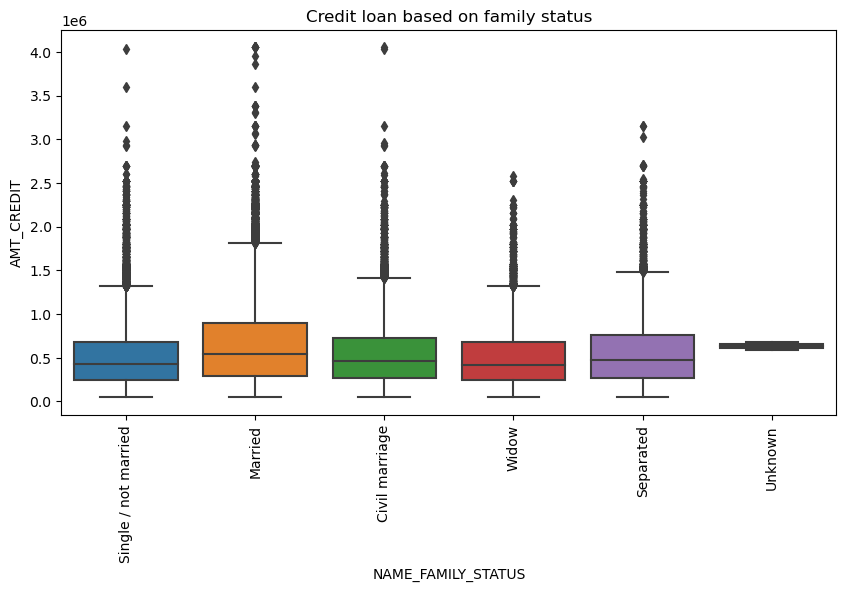

In [225]:
#credit laon based on family status
plt.figure(figsize=(10,5))
sns.boxplot(data =inp0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('Credit loan based on family status')
plt.show()

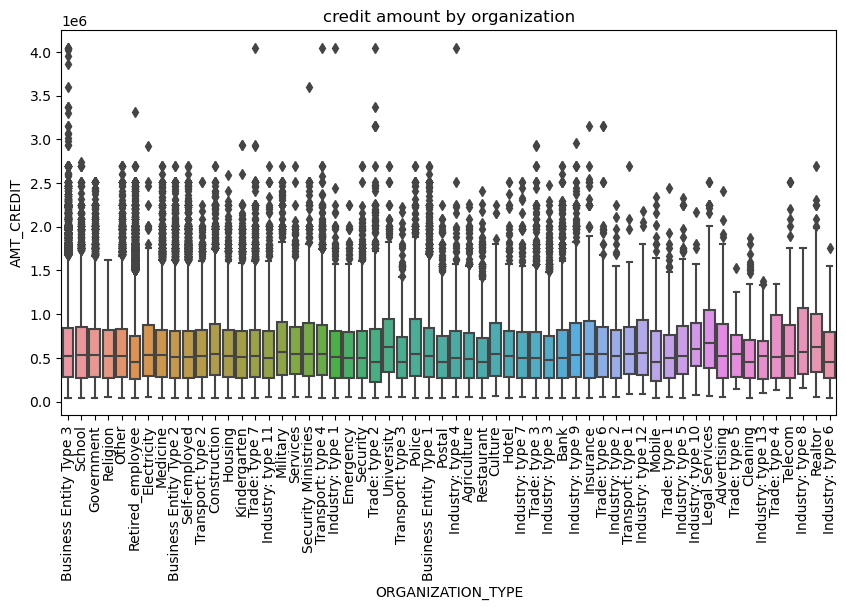

In [226]:
#checking the credit loan for the organization type
plt.figure(figsize=(10,5))
sns.boxplot(data =inp0, x='ORGANIZATION_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('credit amount by organization')
plt.show()

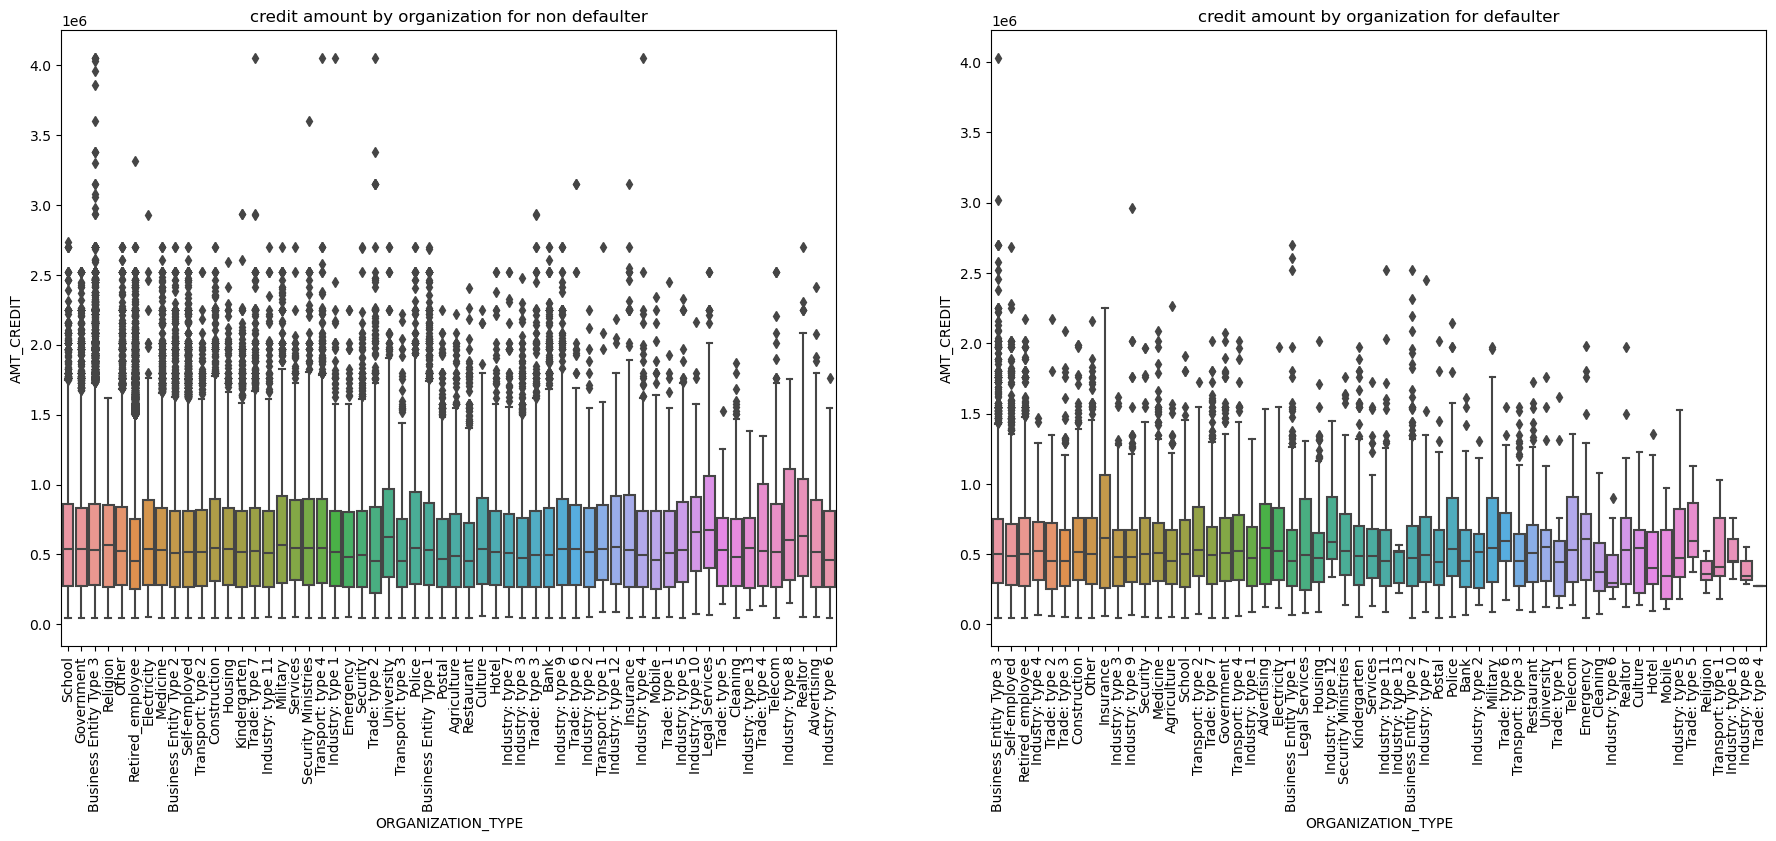

In [227]:
#combining both the data types for defaulter vs non defaulter
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.boxplot(data =inp0_target0, x='ORGANIZATION_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('credit amount by organization for non defaulter')

plt.subplot(1,2,2)
sns.boxplot(data =inp0_target1, x='ORGANIZATION_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('credit amount by organization for defaulter')
plt.show()

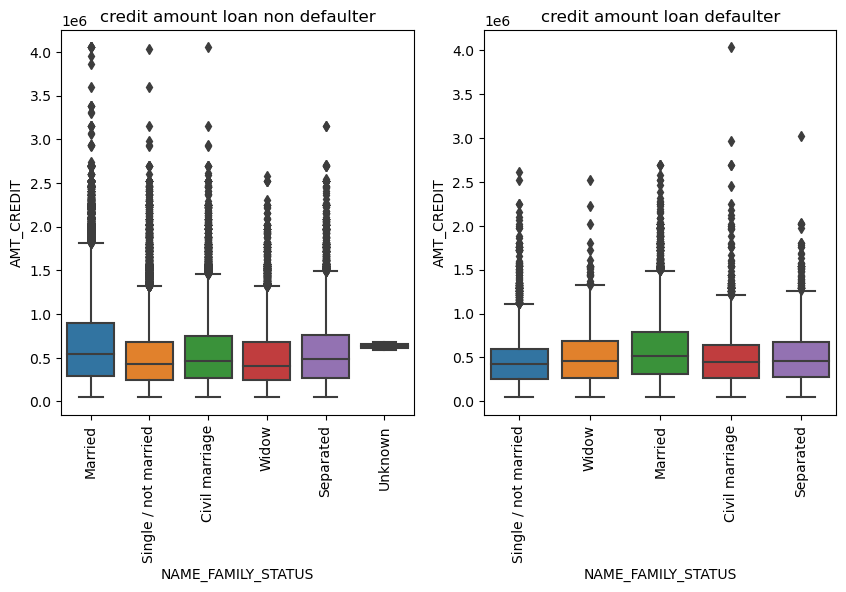

In [228]:
#checking the family status graph based on defaulters and non defaulters
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data =inp0_target0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('credit amount loan non defaulter')

plt.subplot(1,2,2)
sns.boxplot(data =inp0_target1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.title('credit amount loan defaulter')
plt.show()

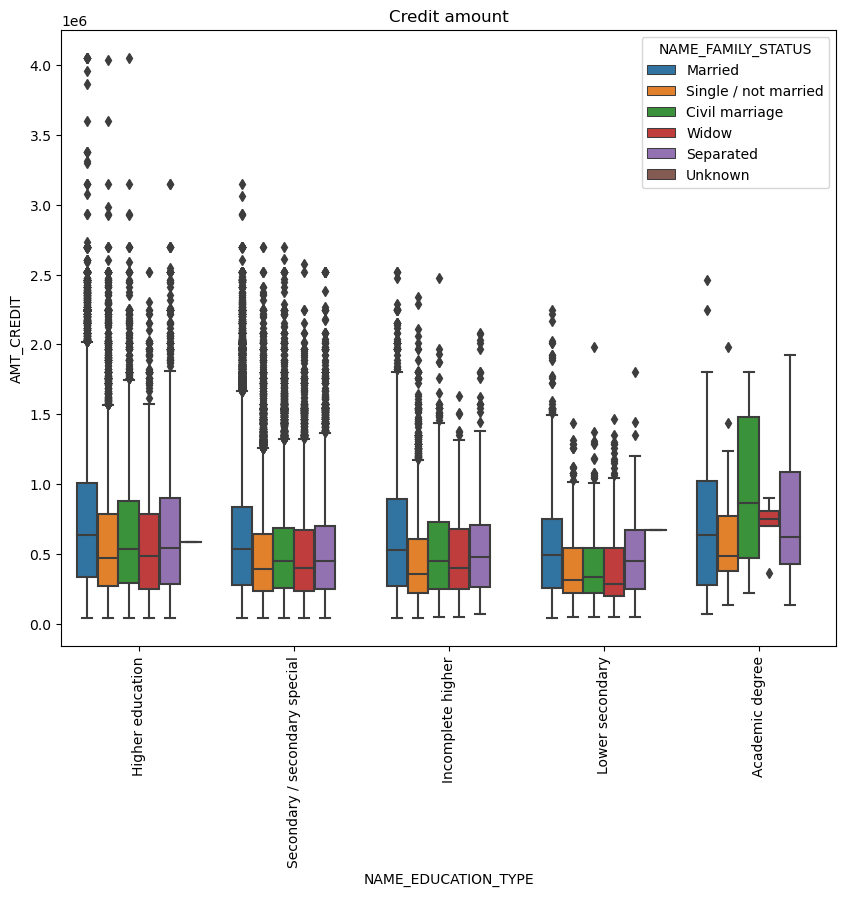

In [229]:
#now multivariate
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.boxplot(data =inp0_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit amount')
plt.show()

In [230]:
#now we will merge the two dataframes that we created with the dataframe that was given

In [231]:
inp0.info()#Checking the info of inp0 last time to see if anything is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [232]:
#since the dataset that has to be merged is alredy been uploaed in the starting we will just strat with checking info

In [233]:
inp1.info()#checking 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [234]:
null_value4= inp1.isnull().sum()*100/len(inp1)
null_value4=null_value4[null_value4.values>30.00]
null_value4

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [235]:
inp1.drop(labels=null_value4.index,axis='columns',inplace=True)#dropping the columns

In [236]:
inp1.shape#checking if the columns have been dropped or not

(1670214, 26)

In [237]:
#checking the remaining percentage of missing values
null_value5= inp1.isnull().sum()*100/len(inp1)
null_value5=null_value5[null_value5>0.0000]
null_value5.sort_values(ascending=False)

AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
AMT_CREDIT              0.000060
dtype: float64

In [238]:
#Imputing them one by one we get

In [239]:
inp1.AMT_GOODS_PRICE.value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [240]:
median_amt=inp1.AMT_GOODS_PRICE.median()

In [241]:
inp1.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

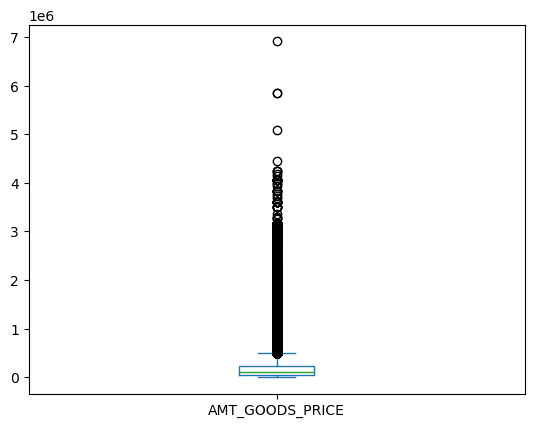

In [242]:
inp1.AMT_GOODS_PRICE.plot.box()
plt.show()

In [243]:
inp1.loc[inp1['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=median_amt

In [244]:
inp1.AMT_GOODS_PRICE.isnull().sum()

0

In [245]:
inp1.AMT_ANNUITY.value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [246]:
inp1.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

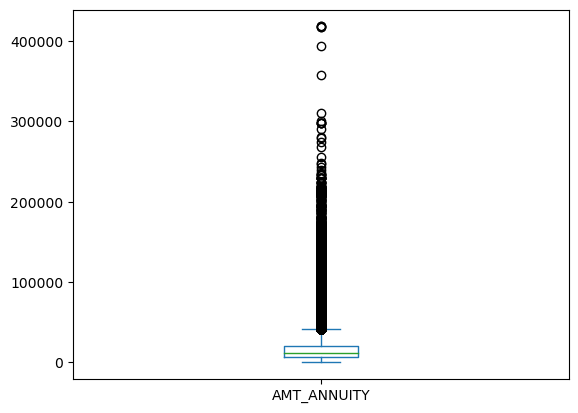

In [247]:
inp1.AMT_ANNUITY.plot.box()
plt.show()

In [248]:
median_annu=inp1.AMT_ANNUITY.median()

In [249]:
inp1.loc[inp1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=median_annu

In [250]:
inp1.AMT_ANNUITY.isnull().sum()

0

In [251]:
inp1.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [252]:
median_cnt=inp1.CNT_PAYMENT.median()

In [253]:
inp1.loc[inp1['CNT_PAYMENT'].isnull(),'CNT_PAYMENT']=median_cnt
inp1.CNT_PAYMENT.isnull().sum()

0

In [254]:
inp1.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [255]:
inp1.PRODUCT_COMBINATION.astype('object')

0             POS mobile with interest
1                     Cash X-Sell: low
2                    Cash X-Sell: high
3                  Cash X-Sell: middle
4                    Cash Street: high
                      ...             
1670209     POS industry with interest
1670210     POS industry with interest
1670211    POS household with interest
1670212               Cash X-Sell: low
1670213            Cash X-Sell: middle
Name: PRODUCT_COMBINATION, Length: 1670214, dtype: object

In [256]:
median_pro=inp1.PRODUCT_COMBINATION.mode()[0]
median_pro

'Cash'

In [257]:
inp1.PRODUCT_COMBINATION.fillna(median_pro,inplace=True)

In [258]:
inp1.AMT_CREDIT.value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [259]:
median_cre=inp1.AMT_CREDIT.mode()[0]
median_cre

0.0

In [260]:
inp1.AMT_CREDIT.fillna(median_cre,inplace=True)

In [261]:
#checking if there are any more changes that need to be done

In [262]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [263]:
negative_value1=['DAYS_DECISION','SELLERPLACE_AREA']# there were some negative values that need to be changed

In [264]:
inp1[negative_value1]=abs(inp1[negative_value1])#changed

In [265]:
inp1.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100#checking the percent of diff values

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [266]:
inp1.drop('NAME_SELLER_INDUSTRY',inplace=True,axis=1)#since the percent of missing value is too high we will just drop it

In [267]:
inp1.NAME_PRODUCT_TYPE.value_counts(normalize=True)*100

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

In [268]:
inp1.drop('NAME_PRODUCT_TYPE',inplace=True,axis=1)#same as above

In [269]:
inp1.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [270]:
inp1.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [271]:
inp1.CODE_REJECT_REASON.value_counts(normalize=True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [272]:
inp1.drop(['NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_PAYMENT_TYPE'],inplace=True,axis=1) #since all three have high missing value percentage we will just drop them

In [273]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,73,Repeater,Mobile,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,164,Repeater,XNA,Cash,Contact center,1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,301,Repeater,XNA,Cash,Credit and cash offices,1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,512,Repeater,XNA,Cash,Credit and cash offices,1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,781,Repeater,XNA,Cash,Credit and cash offices,1,24.0,high,Cash Street: high


In [274]:
inp1.NAME_GOODS_CATEGORY.value_counts(normalize=True)*100

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

In [275]:
inp1.drop('NAME_GOODS_CATEGORY',inplace=True,axis=1)#missed one dropping now 

In [276]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,73,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,164,Repeater,Cash,Contact center,1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,301,Repeater,Cash,Credit and cash offices,1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,512,Repeater,Cash,Credit and cash offices,1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,781,Repeater,Cash,Credit and cash offices,1,24.0,high,Cash Street: high


In [277]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

In [278]:
inp1.CNT_PAYMENT.astype('int64')

0          12
1          36
2          12
3          12
4          24
           ..
1670209    30
1670210    12
1670211    10
1670212    12
1670213    48
Name: CNT_PAYMENT, Length: 1670214, dtype: int64

# Now the data is cleaned we will merge the documents

In [279]:
inp2 = pd.merge(left=inp0,right=inp1,how='inner', on='SK_ID_CURR')#merging the documents

In [280]:
inp2.head()#checking

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,1134,0,0,0,0,0,1,200000-225000,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Approved,606,New,POS,Stone,500,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,828,0,0,0,0,0,0,250000-275000,900000+,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Approved,746,Repeater,Cash,Credit and cash offices,1,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,828,0,0,0,0,0,0,250000-275000,900000+,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Approved,828,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,828,0,0,0,0,0,0,250000-275000,900000+,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Approved,2341,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,815,0,0,0,0,0,0,50000-75000,100000-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,Approved,815,New,POS,Regional / Local,30,4.0,middle,POS mobile without interest


In [281]:
inp2.shape#finding shape

(1413701, 64)

In [282]:
inp2.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

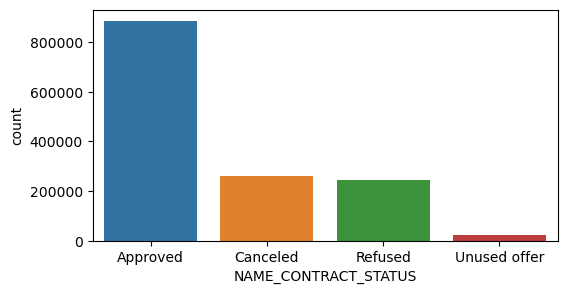

In [283]:
#how many loans are approved or how many were rejected
plt.figure(figsize=(6,3))
sns.countplot(data=inp2,x='NAME_CONTRACT_STATUS')

In [284]:
#describing a list of important columns so thta it will be easy to find meaningful data
imp_col=['NAME_CONTRACT_TYPE_x','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','ORGANIZATION_TYPE']

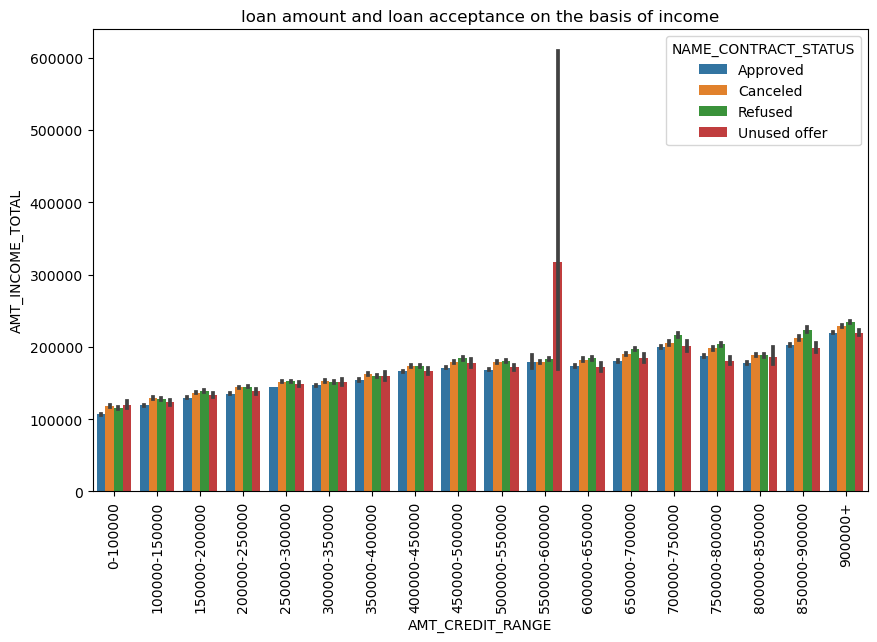

In [285]:
#loan amount and loan acceptance on the basis of income
plt.figure(figsize=(10,6))
sns.barplot(data=inp2,x='AMT_CREDIT_RANGE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS').set(title='loan amount and loan acceptance on the basis of income')
plt.xticks(rotation=90)
plt.show()

In [286]:
#now what was done earlier we will alsop divide this data set into two parts for defaulters and non defaulters

In [287]:
inp2_target0=inp2.loc[inp2.TARGET==0]#for non defaulters


In [288]:
inp2_target1=inp2.loc[inp2.TARGET==1]#for defaulters

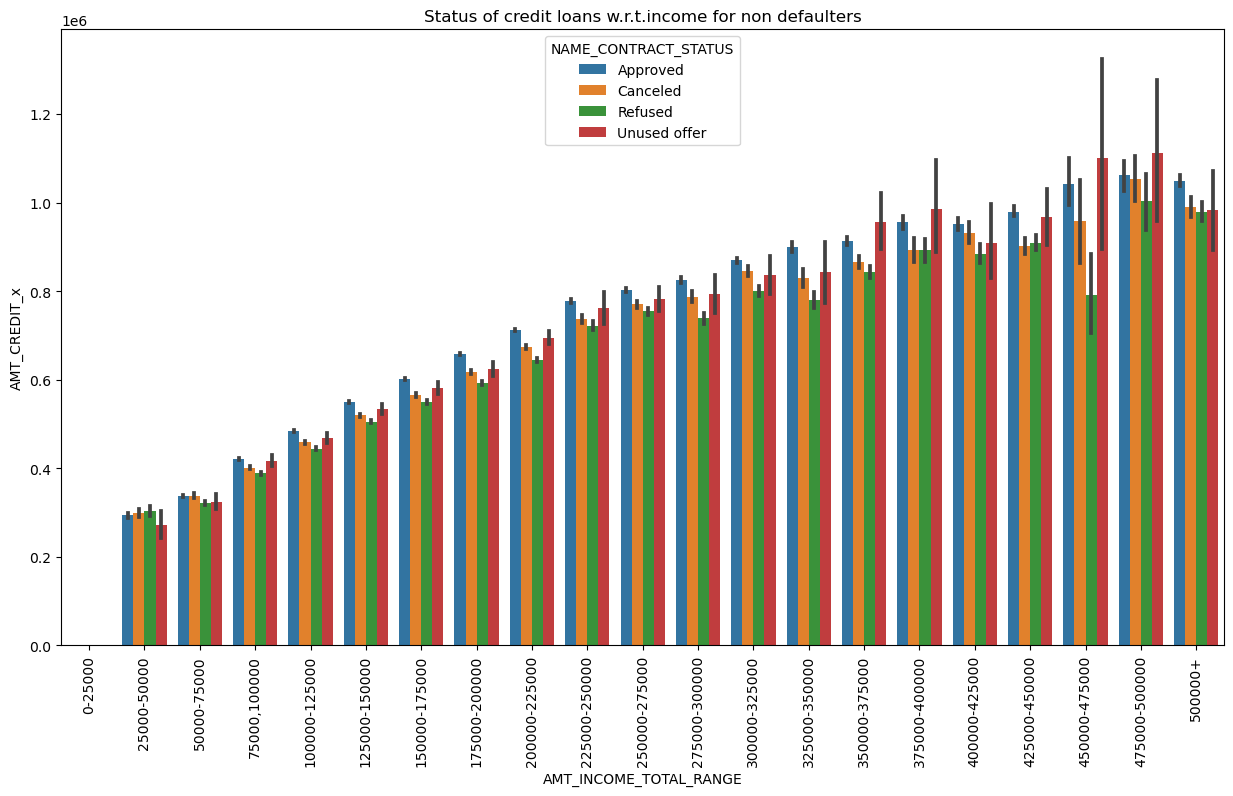

In [289]:
#Checking loan acceptance status based on income amount and credit amount for non defaulters
plt.figure(figsize=(15,8))
sns.barplot(data=inp2_target0,x='AMT_INCOME_TOTAL_RANGE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t.income for non defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Checking loan acceptance status based on income amount and credit amount for defaulters
plt.figure(figsize=(15,8))
sns.barplot(data=inp2_target1,x='AMT_INCOME_TOTAL_RANGE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t.income for defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Checking loan acceptance status based on income amount and credit amount for non defaulters and for defaulters
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.barplot(data=inp2_target0,x='AMT_INCOME_TOTAL_RANGE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t.income for non defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=inp2_target1,x='AMT_INCOME_TOTAL_RANGE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t.income for defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#'Status of credit loans w.r.t. education for non defaulters'
plt.figure(figsize=(15,8))
sns.barplot(data=inp2_target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t. education for non defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#'Status of credit loans w.r.t. education for defaulters'
plt.figure(figsize=(15,8))
sns.barplot(data=inp2_target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t. education for defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#combining the gaphs
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.barplot(data=inp2_target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t. education for defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=inp2_target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='Status of credit loans w.r.t. education for non defaulters')
plt.xticks(rotation=90)
plt.show()

In the defaulter and non-defaulter graph the most approved loan is of academic degree
The amount of loan approved in higher education is greater for non defaulter than defaulter


In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=inp2_target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS').set(title='Status w.r.t.income for respective of education non defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=inp2_target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS').set(title='Status w.r.t.income for respective of education defaulters')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(data=inp2_target0,x='NAME_FAMILY_STATUS',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='loan applied on family status(non defaulters) and its approval')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=inp2_target1,x='NAME_FAMILY_STATUS',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS').set(title='loan applied on family status(defaulters) and its approval')
plt.xticks(rotation=90)
plt.show()


Married persons loans are most approved 
The most unused offer is of married for non defaulters and of widow for non defaulters


In [ ]:
#thank you